In [33]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[ 0  1  2  3  4  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1]


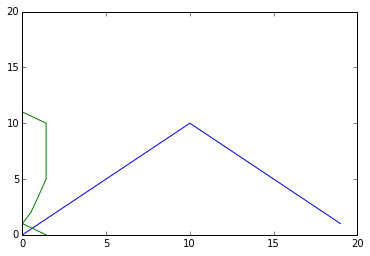

In [30]:
test= np.concatenate([range(0,10),range(10,0,-1)])
print test
meanArray = np.zeros(len(test))
for pos,i in enumerate(test):
    meanArray[i] = np.std(test[pos:pos+5])
plt.plot(test)
plt.plot(meanArray,range(20),)

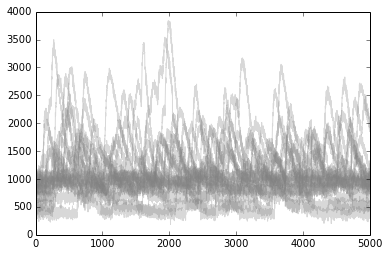

In [34]:
#code used for creation of set1 of simulated data

def alphaKernel (t, A,t_A,t_B):
    return np.float64(A*(np.exp(-t/t_A)-np.exp(-t/t_B)))

xMatrix = np.ndarray(shape=(5000,20),dtype='float32')
apList = []
for i in np.nditer(xMatrix,order='F',flags=['external_loop'],op_flags=['writeonly']):
    localAPlist = []
    xtest = np.repeat(400,5000.)*np.random.normal(loc=2,scale=0.5)
    xnoise = 50. * np.random.normal(size = xtest.size)
    xtest = xtest +xnoise
    apNumber = int(np.random.normal(loc=4,scale = 2)*3)
    
    for j in range(apNumber):
        xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
        y = (alphaKernel(xdata,np.random.normal(loc=5,scale=0.3) * 400,
                        30* np.random.normal(loc=4,scale=1),10*np.random.normal(loc=4,scale=1)))
        APposition = int(np.random.sample(size=1)* 5000)
        localAPlist.append(APposition)
        if(APposition + y.size > xtest.size):
            y.resize(xtest.size-APposition)
        xtest[APposition:APposition + y.size] = xtest[APposition:APposition + y.size] + y
    i[...] = xtest
    plt.plot(xtest,'grey',alpha=0.3)
    apList.append(sorted(localAPlist))
plt.show()
np.savetxt('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/set1',xMatrix,delimiter=',',fmt='%4.6f')

df = pd.DataFrame(apList)
df.to_csv('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/apTimings.csv')

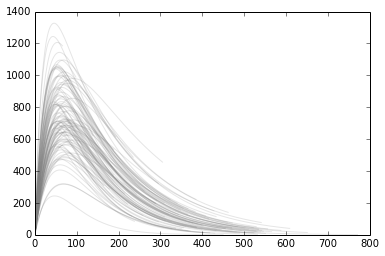

In [57]:
for i in range(100):
    xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
    y = (alphaKernel(xdata,400*np.random.normal(loc=5,scale=0.3),
                        30* np.random.normal(loc=4,scale=1),10*np.random.normal(loc=4,scale=1)))
    plt.plot(y,'grey',alpha=0.2)
plt.show()
